<a href="https://colab.research.google.com/github/tamburins/ESAA-2022-/blob/main/ESAA_11_25(303_310).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 04 sklearn LinearRegression을 이용한 보스턴 주택가격 예측

: 규제가 적용되지 않은 선형회귀를 사이킷런에서 구현한 linearregression을 이용해 보스턴 주택가격 예측 회귀 구현

#### LinearRegression 클래스 - Oridinary Least Squares

In [1]:
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize = False, copy_X = True, n_jobs=1)

SyntaxError: ignored

- 입력 파라미터

> fit_intercept : 불린값으로 디폴값 True. 절편값을 계산할지 말 것인지를 지정하며 False 지정시 절편값 0 대입

> normalize : 디폴값 False. False일 때 파라미터가 무시되고 반대일 경우 회귀 수행 전 정규화 진행

- 속성
> coef_: fit() 수행시 회귀계수를 배열 형태로 지정할지 여부.

> intercept_: intercept 값

- 피처 독립성에 영향을 많이 받기 때문에 다중공산성-피처간 상관관계- 문제 해결ㅇ르 위해 상관관계가 높은 피처들이 많은 경우 독립적인 중요 피처를 남기고 제거하거나 규제를 적용하거나 차원원 축소를를 진행

#### 회귀 평가 지표

- MAE : Mean Absolute Error로 실제값과 예측값으 ㅣ차이를 절댓값으로 변환 후 평균

- MSE: Mean Squared Error로 실제값과 예측값의 제곱평균

- RMSE: MSE값에 루트를 씌워 오류제곱이라 커진 값을 축소

- R^2: 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하여 1에 가까울수록 예측 정확도가 높음

- 사이킷런은 RMSE를 제공하지 않아 RMSE를 구하기 위해 MSE에 제곱근을 씌워 계산하는 함수를 직접 생성해야 함

- MAE - metrics.mean_absolute_error, ‘neg_mean_absolute_error’
- MSE - metrics.mean_squared_error, ‘neg_mean_squared_error’
- R^2  - metrics.r2_score, ‘r2’

-neg는 음수값을 지닌다는 의미인데, 음수값을 실제로는 없음. 실제로는 값이 클수록 나쁘다는 의미인데, 컴퓨터는 역으로 받아들일 소지가 있어 이의 보정을 위해 적용한 것으로, 작은 오류값이 더 큰 숫자로 인식할 수 있도록 함

#### linearregression을 이용한 보스턴 주택가격 회귀 구현


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#boston dataset load
boston = load_boston()

#transform boston dataset to Dataframe
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# target = 주택가격격, add it to PRICSE column
bostonDF['PRICE'] = boston.target
print('size of Boston dataset', bostonDF.shape)
bostonDF.head()

size of Boston dataset (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


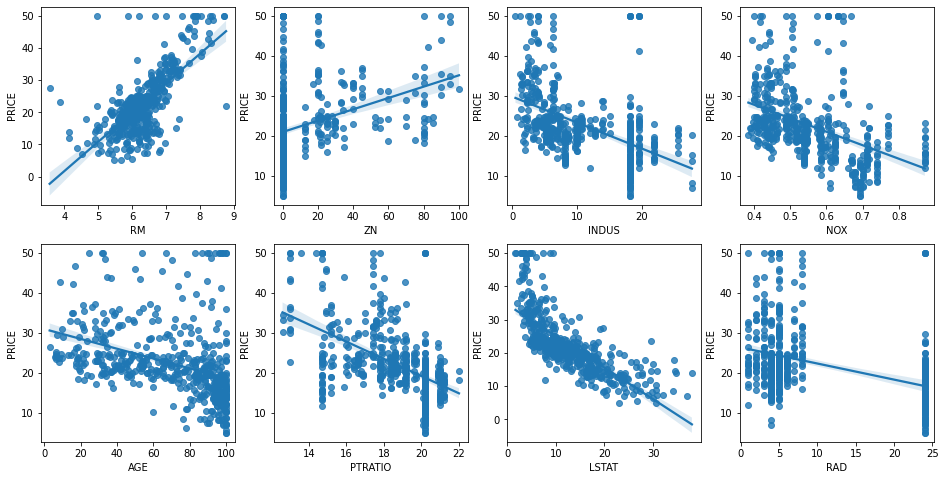

In [21]:
#check each column effect
# when 8 column increases, what difference is in price?
# subplots() are used for drawing many graphs in one picture
# 2 rows, 4 columns subplots, axs = 4*2
fig,axs = plt.subplots(figsize = (16,8),ncols = 4, nrows = 2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_features) :
  row = int(i/4)
  col = i%4
  #with regplot,draw  scatter plot n linear regression line together
  sns.regplot(x = feature,y = 'PRICE',data = bostonDF, ax = axs[row][col])
  

In [14]:
# RM, LSAT affects much
#create bostondf's regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state = 156)

# linear regression OLS, TRAIN PREDICT EVALUATE
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


MSE : 17.297, RMSE : 4.159
variance score : 0.757


In [16]:
print('intercept :', lr.intercept_)
print('회귀계수수: ', np.round(lr.coef_, 1))


intercept : 40.99559517216477
회귀계수수:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [17]:
#coef를를 피첩ㄹ별별 회귀계수로로 다시시 매핑핑, 높은은 값값 순으로로 출력력
#회귀귀 계수를를 큰값순순 정렬하기기 위해해 Series로로 생성성. 인덱스스 칼럼명에에 유이이

coeff = pd.Series(data=np.round(lr.coef_, 1),index = X_data.columns)
coeff.sort_values(ascending=False)


RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [19]:
# 최적화를를 수행하며며 coefficient의의 변화화 살펴보기기
# 5개의의 폴드세트에서서 교차검증ㅇ로로 MSE, RMSE를를 측정정
# 작을을 수록록 좋은은 모델임을을 표현하기기 위해해 보정한한 것것 다시시 제거한한 후후 루트씌윅윅
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace = False)
lr = LinearRegression()

#with cross_val_score(), 5folds set MSE, and RMSE
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score로로 반환된된 값은은 모두두 음수수
print(' 5 folds each Negative MES scores: ', np.round(neg_mse_scores, 2))
print('5 folds each RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds avg MSE: {0:.3f}'.format(avg_rmse))

 5 folds each Negative MES scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds each RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds avg MSE: 5.829
